In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Design of a lowpass filter
The design of a lowpass filter is as simple as these few steps:
1. Pick a cutoff frequency -> fc
2. Pick a sampling frequency -> fs
3. Pick a number of coefficients for the filter -> N (it is better that this is an odd number)
4. Calculate the coeffiecents in time domain using the formula
5. Convolve filter with a signal


$$h_L (n) = 
\begin{cases}
2 * f_c,  \quad if \ n = 0 \\
h_L = 2 * f_c * \frac{sin(2*\pi*f_c*n)}{2*\pi*f_c*n} ,\quad elsewhere \\
\end{cases}$$  
$$\quad where \quad f_c = \frac {fcutoff}{fsampling}$$ 


2000.0 100000.0


1.0389044198118977

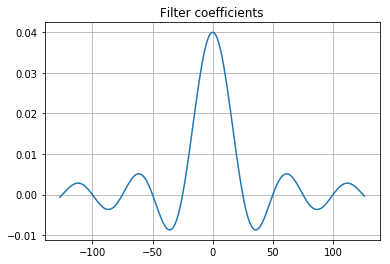

In [2]:
fc = 2e3 # 2kHz
fs = 10e4 # 100kHz
print(fc, fs)
fc_ = fc/fs
N = 255
M = (N-1)/2
h = [2*fc_*np.sin(2*np.pi*fc_*n)/(2*np.pi*fc_*n) if n!=0 
     else 2*fc_ for n in np.arange(-M, M)]
n_range = [n for n in np.arange(-M, M)]
plt.plot(n_range, h)
plt.title("Filter coefficients")
plt.grid()
np.sum(h) #sum should be around 1 for lowpass filter

Note that both the sampling frequency and number of coefficients should be large enough to provide a proper desired characteristics. 
Look at the total sum of filter coefficients - they apporach one

<Container object of 3 artists>

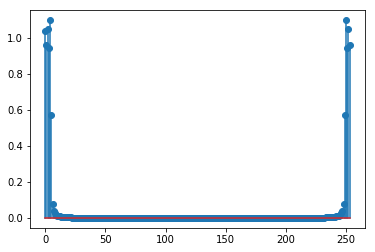

In [3]:
H = np.fft.fft(h)
print
plt.stem(np.abs(H))

5


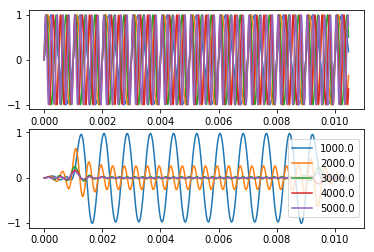

In [4]:
t = np.linspace(0, np.pi/300, 1000)
signals = [np.sin(2*np.pi*f_b*1e3*t) for f_b in range(1,6)]
filtered_signals = [np.convolve(signal, h) for signal in signals]
print(len(filtered_signals))
t_f = np.linspace(0, np.pi/300, len(filtered_signals[0]))
plt.subplot(2, 1, 1)
for signal in signals:
    plt.plot(t, signal)
plt.subplot(2, 1, 2)
for filtered_signal in filtered_signals:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(1,6) ])

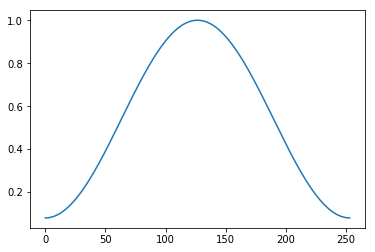

In [5]:
window = np.hamming(len(h))
plt.plot(window)

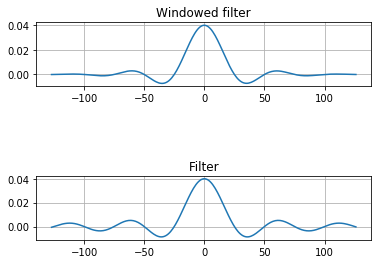

In [6]:
new_h = h*window
plt.subplot(3, 1, 1)
plt.plot(n_range,new_h)
plt.grid()
plt.title("Windowed filter")
plt.subplot(3, 1, 3)
plt.plot(n_range, h)
plt.grid()
plt.title("Filter")

5


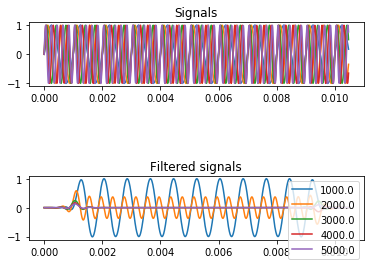

In [7]:
new_filtered_signals = [np.convolve(signal, new_h) for signal in signals]
print(len(filtered_signals))
t_f = np.linspace(0, np.pi/300, len(new_filtered_signals[0]))
plt.subplot(3, 1, 1)
for signal in signals:
    plt.plot(t, signal)
plt.title("Signals")
plt.subplot(3, 1, 3)
for filtered_signal in new_filtered_signals:
    plt.plot(t_f, filtered_signal)
plt.title("Filtered signals")
plt.legend([f_b*1e3 for f_b in range(1,6) ])

It is worth noting that the signals above 3kHz have been quelled more efficiently when the window was applied than before

### Design of a highpass filter
The process is the same as in the case of a lowpass filter, but the formula is changed a little

$$h_L (n) = 
\begin{cases}
1 - 2 * f_c,  \quad if \ n = 0 \\
h_L = -2 * f_c * \frac{sin(2*\pi*f_c*n)}{2*\pi*f_c*n} ,\quad elsewhere \\
\end{cases}$$


Cutoff freq. 5000.0 
Sampling freq. 100000.0


<Container object of 3 artists>

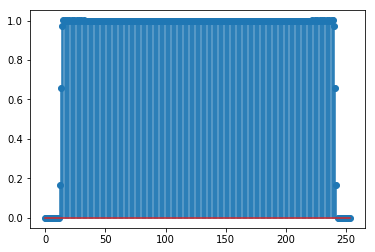

In [8]:
def odd_HPF(fc, fs, N):
    print("Cutoff freq. {} \nSampling freq. {}".format(fc, fs))
    fc_ = fc/fs
    M = (N-1)/2
    h = [-2*fc_*np.sin(2*np.pi*fc_*n)/(2*np.pi*fc_*n) if n!=0 
         else 1-2*fc_ for n in np.arange(-M, M)]
    n_range = [n for n in np.arange(-M, M)]
    return h, n_range
hh, n_range = odd_HPF(5e3, 10e4, 255)
hh = hh*window
plt.stem(np.abs(np.fft.fft(hh)))

5


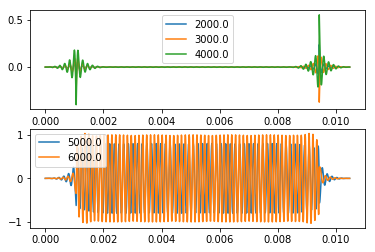

In [9]:
t = np.linspace(0, np.pi/300, 1000)
signals = [np.sin(2*np.pi*f_b*1e3*t) for f_b in range(2,7)]
filtered_signals = [np.convolve(signal, hh) for signal in signals]
print(len(filtered_signals))
t_f = np.linspace(0, np.pi/300, len(filtered_signals[0]))
plt.subplot(2,1,1)
for filtered_signal in filtered_signals[0:3]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(2,5) ])
plt.subplot(2,1,2)
for filtered_signal in filtered_signals[3:]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(5,7) ])

### Designing a bandpass filter
The design of such a filter is trivial once one knows how to implement a low pass filter.
Substracting two LPF in any domain will result in a bandpass filter with frequency constrains of these two LPF cutoff frequencies. Below is the code that illustrates the mentioned idea.

Cutoff frq. 2000.0 
Sampling freq. 100000.0
Cutoff frq. 7000.0 
Sampling freq. 100000.0


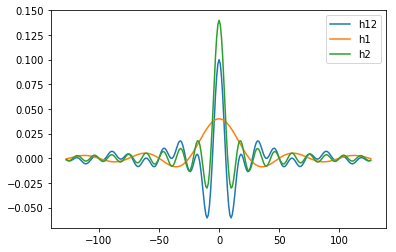

In [10]:
def odd_LPF(fc, fs, N):
    print("Cutoff frq. {} \nSampling freq. {}".format(fc, fs))
    fc_ = fc/fs
    M = (N-1)/2
    h = [2*fc_*np.sin(2*np.pi*fc_*n)/(2*np.pi*fc_*n) if n!=0 
         else 2*fc_ for n in np.arange(-M, M)]
    n_range = [n for n in np.arange(-M, M)]
    return h, n_range
h1, _ = odd_LPF(2e3, 10e4, 255) #LPF with 2kHz cutoff frequency
h2, n_range = odd_LPF(7e3, 10e4, 255) #LPF with 7kHz cutoff frequency
h12 = np.subtract(h2,h1) #BPF with 2kHz - 7kHz pass frequency
plt.plot(n_range,h12)
plt.plot(n_range, h1)
plt.plot(n_range, h2)
plt.legend(['h12', 'h1', 'h2'])

<Container object of 3 artists>

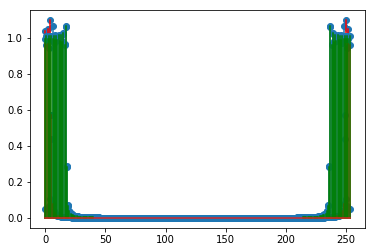

In [11]:
plt.stem(np.abs(np.fft.fft(h12)))
plt.stem(np.abs(np.fft.fft(h1)), 'r')
plt.stem(np.abs(np.fft.fft(h2)), 'g')

10


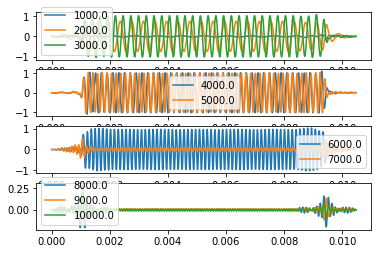

In [12]:
scale = 300
t = np.linspace(0, np.pi/scale, 1000)
signals = [np.sin(2*np.pi*f_b*1e3*t) for f_b in range(1,11)]
filtered_signals = [np.convolve(signal, h12) for signal in signals]
print(len(filtered_signals))
t_f = np.linspace(0, np.pi/scale, len(filtered_signals[0]))

plt.subplot(4,1,1)
for filtered_signal in filtered_signals[0:3]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(1,4) ])
plt.subplot(4,1,2)
for filtered_signal in filtered_signals[3:5]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(4,6) ])
plt.subplot(4,1,3)
for filtered_signal in filtered_signals[5:7]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(6,8) ])
plt.subplot(4,1,4)
for filtered_signal in filtered_signals[7:]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(8,11) ])

The bandpass filter works as expected - it filters out the frequencies outside the range 2kHz - 5kHz

#### Classical method of designing a FIR filter with a specified number of coefficients

The method of filter design is the following:
1. Pick the number of coefficients (N which is the filter order + 1)
2. Specify cutoff frequency
3. Calculate step frequency $fstep = \frac{f_s}{N}$
4. In case of lowpass filter place passing frequencies form $0$ to $K$ and from $-K+1$ to the end
5. Perform IDFT to get filter coefs in time domain
6. Perform inversion take the last $M = \frac{N-2}{2}$ elements ($M = \frac{N-1}{2}$ if $N$ is odd) and move them to the front of the vector
7. Remove last element if necessary i.e. breaks symmetry

##### Example
$$f_{sampling} = 10^4 \ Hz$$

$$f{step} = \frac{f_s}{N} = \frac{10^4}{256} =390 \quad (roughly)$$

$$f_c = 3 \ kHz$$

$$k^{th} \quad value = \frac {3 \ kHz}{390} = 8 \ roughly$$

$$M = \frac{N-1}{2} = 127$$



(0.99609375-4.93038065763e-32j)
255


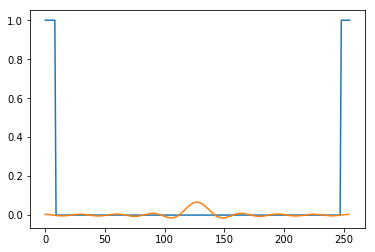

In [13]:
H = np.zeros(256)
N = 256
H[0:9] = 1
H[248:] = 1

h = np.fft.ifft(H)
plt.plot(H)
M = int((N-2)/2)
h_p = np.concatenate((h[-M:],h[0:M+1])) # 3kHz fitler
plt.plot(np.real(h_p))
print(np.sum(h_p))
print(len(h_p))

10


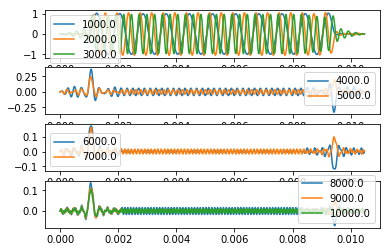

In [14]:
scale = 300
t = np.linspace(0, np.pi/scale, 1000)
signals = [np.sin(2*np.pi*f_b*1e3*t) for f_b in range(1,11)]
filtered_signals = [np.convolve(signal, np.real(h_p)) for signal in signals]
print(len(filtered_signals))
t_f = np.linspace(0, np.pi/scale, len(filtered_signals[0]))

plt.subplot(4,1,1)
for filtered_signal in filtered_signals[0:3]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(1,4) ])
plt.subplot(4,1,2)
for filtered_signal in filtered_signals[3:5]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(4,6) ])
plt.subplot(4,1,3)
for filtered_signal in filtered_signals[5:7]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(6,8) ])
plt.subplot(4,1,4)
for filtered_signal in filtered_signals[7:]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(8,11) ])

(0.99609375-5.20417042793e-18j)
255


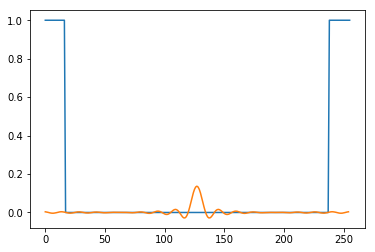

In [15]:
H2 = np.zeros(256)
N = 256
H2[0:17] = 1
H2[238:] = 1

h2 = np.fft.ifft(H2)
plt.plot(H2)
M = int((N-2)/2)
h_p2 = np.concatenate((h2[-M:],h2[0:M+1])) # 7kHz fitler
plt.plot(np.real(h_p2))
print(np.sum(h_p2))
print(len(h_p2))

10


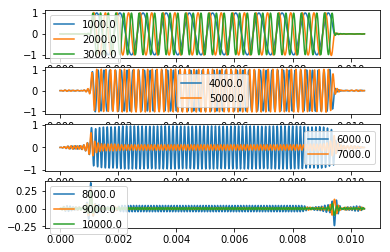

In [16]:
scale = 300
t = np.linspace(0, np.pi/scale, 1000)
signals = [np.sin(2*np.pi*f_b*1e3*t) for f_b in range(1,11)]
filtered_signals = [np.convolve(signal, np.real(h_p2)) for signal in signals]
print(len(filtered_signals))
t_f = np.linspace(0, np.pi/scale, len(filtered_signals[0]))

plt.subplot(4,1,1)
for filtered_signal in filtered_signals[0:3]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(1,4) ])
plt.subplot(4,1,2)
for filtered_signal in filtered_signals[3:5]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(4,6) ])
plt.subplot(4,1,3)
for filtered_signal in filtered_signals[5:7]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(6,8) ])
plt.subplot(4,1,4)
for filtered_signal in filtered_signals[7:]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(8,11) ])

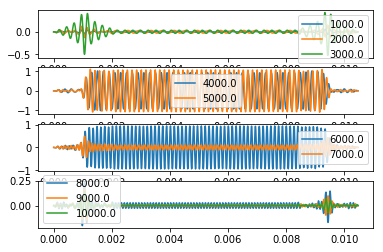

In [17]:
h12 = np.subtract(h_p2, h_p)
scale = 300
t = np.linspace(0, np.pi/scale, 1000)
signals = [np.sin(2*np.pi*f_b*1e3*t) for f_b in range(1,11)]
filtered_signals = [np.convolve(signal, np.real(h12)) for signal in signals]
t_f = np.linspace(0, np.pi/scale, len(filtered_signals[0]))

plt.subplot(4,1,1)
for filtered_signal in filtered_signals[0:3]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(1,4) ])
plt.subplot(4,1,2)
for filtered_signal in filtered_signals[3:5]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(4,6) ])
plt.subplot(4,1,3)
for filtered_signal in filtered_signals[5:7]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(6,8) ])
plt.subplot(4,1,4)
for filtered_signal in filtered_signals[7:]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(8,11) ])

Improvements in filtered frequencies are clearly visible when a window is applied to a filter

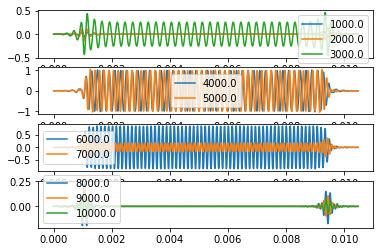

In [18]:
h12 = h12*np.hamming(len(h12))
scale = 300
t = np.linspace(0, np.pi/scale, 1000)
signals = [np.sin(2*np.pi*f_b*1e3*t) for f_b in range(1,11)]
filtered_signals = [np.convolve(signal, np.real(h12)) for signal in signals]
t_f = np.linspace(0, np.pi/scale, len(filtered_signals[0]))

plt.subplot(4,1,1)
for filtered_signal in filtered_signals[0:3]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(1,4) ])
plt.subplot(4,1,2)
for filtered_signal in filtered_signals[3:5]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(4,6) ])
plt.subplot(4,1,3)
for filtered_signal in filtered_signals[5:7]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(6,8) ])
plt.subplot(4,1,4)
for filtered_signal in filtered_signals[7:]:
    plt.plot(t_f, filtered_signal)
plt.legend([f_b*1e3 for f_b in range(8,11) ])

Below are the filter coefficients in time and frequency domain

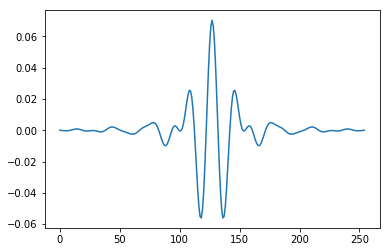

In [19]:
plt.plot(np.real(h12))

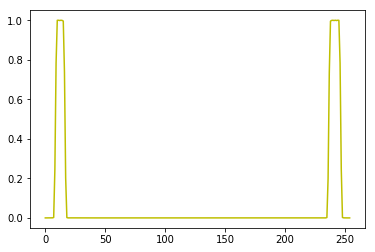

In [20]:
plt.plot(np.abs(np.fft.fft(h12)), 'y')